<a href="https://colab.research.google.com/github/BALaka-18/Unsupervised-algorithm-and-Dimensionality-Reduction/blob/master/K_Mean_Clustering_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import numpy as np
import pandas as pd
import matplotlib as ml
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
ml.style.use('fivethirtyeight')
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_samples,silhouette_score

#### K Means clustering from scratch

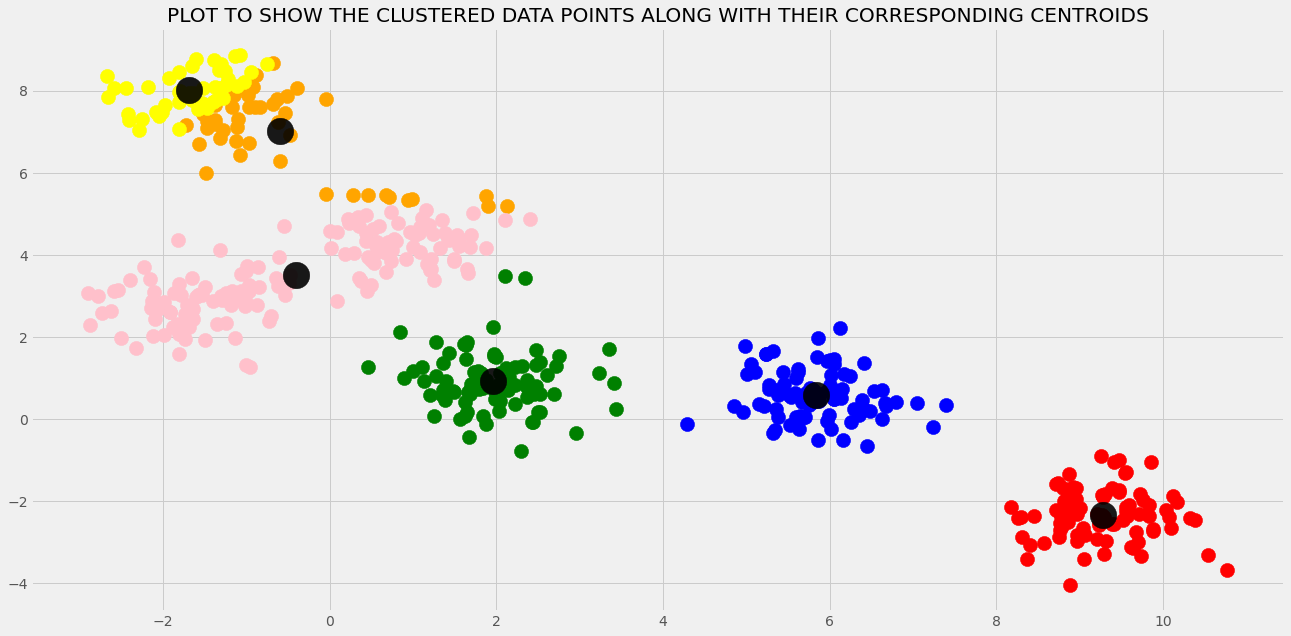

In [45]:
class KMeans():
  def __init__(self,k=3,max_iterations=500):
    self.k = k
    self.max_iterations = max_iterations
  # Calculate euclidean distance
  def distance(self,x1,x2):
    return np.linalg.norm(x1-x2,axis=0)
  # Fit method
  def fit(self,X):
    # Step 1: Initialize k centroids
    # Taking the first k data points as centroids
    self.centroids = {}
    for i in range(self.k):
      self.centroids[i] = X[i]
    
    # Step 2: Initialize k empty classes/labels
    for i in range(self.max_iterations):
      self.classes = {}
      for j in range(self.k):
        self.classes[j] = []
      # Step 3: For each point find distance between that point an all the centroids.
      for point in X:
        distances = []
        for i in self.centroids:
          distances.append(self.distance(point,self.centroids[i]))
        # Step 4: Select the cluster(centroid) for which distance is the least. So, if the second distance is the smallest, it will go to the 2nd cluster, i.e, cluster[1]
        cluster_ident = distances.index(min(distances))
        self.classes[cluster_ident].append(point)
        # Step 5: Repeat for all points
    # Step 6: All datapoints are now classified into clusters. Begin update step.
    for cluster_ident in self.classes:
      self.centroids[cluster_ident] = np.average(self.classes[cluster_ident],axis=0)

# Test Run and Plotting the segregated clusters.
# Data
X,Y = datasets.make_blobs(
    n_samples=500,
    centers=6,
    cluster_std=0.60,
    random_state=0
)
# Clustering
clusters = KMeans(k=6)
clusters.fit(X)

# Plotting the clusters
colors = ['red','green','orange','blue','yellow','pink']
plt.figure(figsize=(20,10))
for cluster_ident in clusters.classes:
  color = colors[cluster_ident]
  for features in clusters.classes[cluster_ident]:
    plt.scatter(features[0],features[1],s=200,color=color)
for centroid in clusters.centroids:
  plt.scatter(clusters.centroids[centroid][0],clusters.centroids[centroid][1],s=700,c='black',alpha=0.9)
plt.title("PLOT TO SHOW THE CLUSTERED DATA POINTS ALONG WITH THEIR CORRESPONDING CENTROIDS")
plt.show()

In [46]:
data = []
c_x,c_y=[clusters.centroids[centroid][0] for centroid in clusters.centroids],[clusters.centroids[centroid][1] for centroid in clusters.centroids]
colors = ['red','green','orange','blue','yellow','pink']
for cluster_ident in clusters.classes:
  x,y = [],[]
  color = colors[cluster_ident]
  for features in clusters.classes[cluster_ident]:
    x.append(features[0])
    y.append(features[1])
  data.append(go.Scatter(
      x=x,
      y=y,
      mode='markers',
      marker=dict(
          size=[15]*(len(x)),
          color=[color]*(len(x))
      ),
      name='Class {}'.format(cluster_ident + 1)
  ))
data.append(go.Scatter(
    x=c_x,
    y=c_y,
    mode='markers',
    marker=dict(
        size=[30]*(len(x)),
        color=['black']*(len(x))
    ),
    name='Centroid'
))
figure = go.Figure(data=data)
figure.update_layout(title='PLOT TO SHOW THE CLUSTERED DATA POINTS ALONG WITH THEIR CORRESPONDING CENTROIDS')
figure.show()